In [41]:
# This is a script file which will target Data Incubatore Challenge.
""" 
DataSet and files: 
- NYPD Motor Vehicle Collisions - NYPD_Motor_Vehicle_Collisions.csv

The city of New York has collected data on every automobile collision in city limits since mid-2012. 
Collisions are broken down by borough, zip code, latitude/longitude, and street name. Each entry describes injuries/deaths,
collision causes, and vehicle types involved. 
The data can be downloaded from: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95 
Download the "NYPD Motor Vehicle Collisions" dataset in .csv format. 
The download link can be found under the "Export" tab. 
Information on the variables can be found on this page, as well, 
along with a preview of the rows of the dataset. 
For all questions, do not use data occurring after December 31, 2018.

Hypothesis: 
- Multi Question

Developer&Auditer: zos
Date: May/3/2019"""

' \nDataSet and files: \n- NYPD Motor Vehicle Collisions - NYPD_Motor_Vehicle_Collisions.csv\n\nThe city of New York has collected data on every automobile collision in city limits since mid-2012. \nCollisions are broken down by borough, zip code, latitude/longitude, and street name. Each entry describes injuries/deaths,\ncollision causes, and vehicle types involved. \nThe data can be downloaded from: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95 \nDownload the "NYPD Motor Vehicle Collisions" dataset in .csv format. \nThe download link can be found under the "Export" tab. \nInformation on the variables can be found on this page, as well, \nalong with a preview of the rows of the dataset. \nFor all questions, do not use data occurring after December 31, 2018.\n\nHypothesis: \n- Multi Question\n\nDeveloper&Auditer: zos\nDate: May/3/2019'

In [43]:
import numpy as np
import pandas as pd
import scipy.stats as stats
%config InlineBackend.figure_format = 'retina'
from datetime import datetime
from dateutil.parser import parse

In [45]:
nypd_data = pd.read_csv("C:\\Users\\Z-SH\\Documents\\GitHub\\DataIncubator2019\\NYPD_Motor_Vehicle_Collisions.csv", low_memory=False)

In [47]:
nypd_data.columns = nypd_data.columns.str.replace(' ', '_')#nypd_data.count()

In [49]:
# Data Cleansing using Pandas
nypd_data.shape

(1486791, 29)

In [51]:
nypd_data.head(2)

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,UNIQUE_KEY,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,04/29/2019,0:00,BRONX,10453,40.8484400000,-73.9106800000,"(40.84844, -73.91068)",TOWNSEND AVENUE,EAST 176 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4122943,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,04/29/2019,0:00,QUEENS,11365,40.7365950000,-73.8001300000,"(40.736595, -73.80013)",169 STREET,65 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4122788,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [53]:
nypd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486791 entries, 0 to 1486790
Data columns (total 29 columns):
DATE                             1486791 non-null object
TIME                             1486791 non-null object
BOROUGH                          1041808 non-null object
ZIP_CODE                         1041633 non-null object
LATITUDE                         1300317 non-null float64
LONGITUDE                        1300317 non-null float64
LOCATION                         1300317 non-null object
ON_STREET_NAME                   1201198 non-null object
CROSS_STREET_NAME                1010379 non-null object
OFF_STREET_NAME                  193440 non-null object
NUMBER_OF_PERSONS_INJURED        1486774 non-null float64
NUMBER_OF_PERSONS_KILLED         1486760 non-null float64
NUMBER_OF_PEDESTRIANS_INJURED    1486791 non-null int64
NUMBER_OF_PEDESTRIANS_KILLED     1486791 non-null int64
NUMBER_OF_CYCLIST_INJURED        1486791 non-null int64
NUMBER_OF_CYCLIST_KILLED        

In [55]:
#What is the total number of persons injured in the dataset (up to December 31, 2018?)
int(nypd_data[nypd_data['DATE'] <= '12/31/2018']['NUMBER_OF_PERSONS_INJURED'].sum())

385743

In [57]:
# other we can include all people either CYCLIST,MOTORIST, PEDESTRIANS or PERSONS cause they are considered persons also
all_people = int(nypd_data['NUMBER_OF_CYCLIST_INJURED'].sum()) + int(nypd_data['NUMBER_OF_MOTORIST_INJURED'].sum()) + int(nypd_data['NUMBER_OF_PEDESTRIANS_INJURED'].sum()) + int(nypd_data['NUMBER_OF_PERSONS_INJURED'].sum())
all_people

771722

In [59]:
nypd_data.shape

(1486791, 29)

In [219]:
# What proportion of all collisions in 2016 occured in Brooklyn? Only consider entries with a non-null value for BOROUGH.
collisions = nypd_data[nypd_data.BOROUGH.notnull()]
collisions.DATE = pd.to_datetime(collisions.DATE)
collisions_2016 = collisions[(collisions['DATE'] >= '2016-01-01') & (collisions['DATE'] <= '2016-12-31')]
BROOKLYN_collisions_2016 = collisions_2016[collisions_2016['BOROUGH'] == 'BROOKLYN']
proportion_BROOKLYN_collisions_2016 = len(BROOKLYN_collisions_2016)/len(collisions)
proportion_BROOKLYN_collisions_2016

C:\Anaconda3\envs\MiSK\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.04555637891050942

In [63]:
#collisions_2016.columns
#collisions_2016['NUMBER OF CYCLIST INJURED'].sum()
collisions_2016['NUMBER_OF_CYCLIST_KILLED'].sum()

14

In [65]:
#What proportion of collisions in 2016 resulted in injury or death of a cyclist?
cyclist_collisions_2016 = collisions_2016['NUMBER_OF_CYCLIST_INJURED'].sum() + collisions_2016['NUMBER_OF_CYCLIST_KILLED'].sum()
proportion_cyclist_collisions_2016 = (cyclist_collisions_2016)/len(collisions_2016)
proportion_cyclist_collisions_2016

0.02407870101572846

In [67]:
nypd_data.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP_CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
       'NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED',
       'NUMBER_OF_PEDESTRIANS_INJURED', 'NUMBER_OF_PEDESTRIANS_KILLED',
       'NUMBER_OF_CYCLIST_INJURED', 'NUMBER_OF_CYCLIST_KILLED',
       'NUMBER_OF_MOTORIST_INJURED', 'NUMBER_OF_MOTORIST_KILLED',
       'CONTRIBUTING_FACTOR_VEHICLE_1', 'CONTRIBUTING_FACTOR_VEHICLE_2',
       'CONTRIBUTING_FACTOR_VEHICLE_3', 'CONTRIBUTING_FACTOR_VEHICLE_4',
       'CONTRIBUTING_FACTOR_VEHICLE_5', 'UNIQUE_KEY', 'VEHICLE_TYPE_CODE_1',
       'VEHICLE_TYPE_CODE_2', 'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4',
       'VEHICLE_TYPE_CODE_5'],
      dtype='object')

In [68]:
#For each borough, compute the number of accidents per capita involving alcohol in 2017. 
#Report the highest rate among the 5 boroughs. Use populations 
#as given by https://en.wikipedia.org/wiki/Demographics_of_New_York_City.
alcohol_Inv = collisions[ (collisions.CONTRIBUTING_FACTOR_VEHICLE_1 == 'Alcohol Involvement') 
                   | (collisions.CONTRIBUTING_FACTOR_VEHICLE_2 == 'Alcohol Involvement')
                                  | (collisions.CONTRIBUTING_FACTOR_VEHICLE_3 == 'Alcohol Involvement')
                                  | (collisions.CONTRIBUTING_FACTOR_VEHICLE_4 == 'Alcohol Involvement')
                                 | (collisions.CONTRIBUTING_FACTOR_VEHICLE_5 == 'Alcohol Involvement')]
alcohol_Inv_2017 = alcohol_Inv[(alcohol_Inv['DATE'] >= '2017-01-01') & (alcohol_Inv['DATE'] <= '2017-12-31')]
alcohol_Inv_2017

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,UNIQUE_KEY,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
298297,2017-12-31,1:00,QUEENS,11375,40.7205660000,-73.8459000000,"(40.720566, -73.8459)",70 ROAD,AUSTIN STREET,NaN,...,NaN,NaN,NaN,NaN,3820199,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
298299,2017-12-31,1:00,BROOKLYN,11236,40.6448630000,-73.9111300000,"(40.644863, -73.91113)",REMSEN AVENUE,FOSTER AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,3820165,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
298309,2017-12-31,1:30,QUEENS,11368,40.7420960000,-73.8674800000,"(40.742096, -73.86748)",CORONA AVENUE,JUNCTION BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3829416,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
298327,2017-12-31,20:30,QUEENS,11369,40.7582660000,-73.8801800000,"(40.758266, -73.88018)",32 AVENUE,88 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3822875,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
298372,2017-12-31,23:00,QUEENS,11369,40.7643050000,-73.8695760000,"(40.764305, -73.869576)",NaN,NaN,25-42 MCINTOSH STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,3821642,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE
298492,2017-12-30,0:20,MANHATTAN,10014,40.7274780000,-74.0054860000,"(40.727478, -74.005486)",NaN,NaN,180 VARICK STREET,...,NaN,NaN,NaN,NaN,3819002,TAXI,NaN,NaN,NaN,NaN
298749,2017-12-30,16:54,QUEENS,11417,40.6780100000,-73.8497500000,"(40.67801, -73.84975)",88 STREET,107 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3819297,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
298819,2017-12-30,19:00,BRONX,10472,40.8290520000,-73.8503800000,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,3818792,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN
298821,2017-12-30,19:04,QUEENS,11420,40.6803250000,-73.8289800000,"(40.680325, -73.82898)",109 AVENUE,111 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3819164,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
298857,2017-12-30,1:22,QUEENS,11104,40.7490270000,-73.9145360000,"(40.749027, -73.914536)",NaN,NaN,49-03 39 AVENUE,...,Unspecified,Unspecified,NaN,NaN,3819239,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN


In [69]:
len(alcohol_Inv_2017)

1747

In [70]:
highest_acc = alcohol_Inv_2017.groupby(['BOROUGH'], as_index=False).count()
highest_acc

,BOROUGH,DATE,TIME,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,UNIQUE_KEY,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,BRONX,274,274,274,268,268,268,176,176,98,...,243,63,25,9,274,274,237,69,34,13
1,BROOKLYN,602,602,602,589,589,589,396,396,206,...,538,138,61,23,602,601,505,145,72,25
2,MANHATTAN,259,259,258,252,252,252,162,162,97,...,219,52,20,5,259,259,198,53,27,11
3,QUEENS,512,512,511,504,504,504,328,327,184,...,436,156,71,27,512,511,417,161,81,31
4,STATEN ISLAND,100,100,100,98,98,98,71,71,29,...,76,23,11,1,100,100,73,26,14,2


In [71]:
highest_acc = highest_acc[['UNIQUE_KEY','BOROUGH']]
highest_acc

,UNIQUE_KEY,BOROUGH
0,274,BRONX
1,602,BROOKLYN
2,259,MANHATTAN
3,512,QUEENS
4,100,STATEN ISLAND


In [72]:
#Create a Population Dataframe from https://en.wikipedia.org/wiki/Demographics_of_New_York_City.
a = {
    'BOROUGH':['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND'],
    'POPULATION':['1471160','2648771','1664727','2358582','479458']
     }
New_York_population = pd.DataFrame(a,columns=['BOROUGH','POPULATION'])
New_York_population['POPULATION'] = New_York_population['POPULATION'].astype(str).astype(np.int64)
New_York_population

,BOROUGH,POPULATION
0,BRONX,1471160
1,BROOKLYN,2648771
2,MANHATTAN,1664727
3,QUEENS,2358582
4,STATEN ISLAND,479458


In [73]:
highest_acc.dtypes

UNIQUE_KEY     int64
BOROUGH       object
dtype: object

In [74]:
New_York_population.dtypes

BOROUGH       object
POPULATION     int64
dtype: object

In [75]:
highest_acc_population = pd.merge(highest_acc, New_York_population, on='BOROUGH')
highest_acc_population

,UNIQUE_KEY,BOROUGH,POPULATION
0,274,BRONX,1471160
1,602,BROOKLYN,2648771
2,259,MANHATTAN,1664727
3,512,QUEENS,2358582
4,100,STATEN ISLAND,479458


In [76]:
pd.options.display.float_format = '{:,.10f}'.format
highest_acc_population['proportion'] = highest_acc_population.UNIQUE_KEY / highest_acc_population.POPULATION
highest_acc_population.sort_values(by=['proportion','BOROUGH'],ascending=False)

,UNIQUE_KEY,BOROUGH,POPULATION,proportion
1,602,BROOKLYN,2648771,0.0002272752
3,512,QUEENS,2358582,0.0002170796
4,100,STATEN ISLAND,479458,0.0002085688
0,274,BRONX,1471160,0.0001862476
2,259,MANHATTAN,1664727,0.0001555811


In [77]:
collisions_2016.head(10)

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,UNIQUE_KEY,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
516352,2016-12-27,13:24,QUEENS,11377,40.7510830000,-73.9079000000,"(40.751083, -73.9079)",37 AVENUE,54 STREET,NaN,...,NaN,NaN,NaN,NaN,3587902,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
517777,2016-12-27,13:25,BRONX,10467,40.8787300000,-73.8668400000,"(40.87873, -73.86684)",NaN,NaN,3558 WILLETT AVENUE,...,NaN,NaN,NaN,NaN,3587649,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
518195,2016-12-23,14:50,BRONX,10459,40.8291050000,-73.8900000000,"(40.829105, -73.89)",NaN,NaN,1257 VYSE AVENUE,...,NaN,NaN,NaN,NaN,3586566,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
520130,2016-12-22,18:06,BRONX,10474,40.8123360000,-73.8888100000,"(40.812336, -73.88881)",NaN,NaN,613 BARRETTO STREET,...,NaN,NaN,NaN,NaN,3586150,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
521480,2016-12-20,15:47,BROOKLYN,11217,40.6871830000,-73.9766000000,"(40.687183, -73.9766)",FULTON STREET,FORT GREENE PLACE,NaN,...,NaN,NaN,NaN,NaN,3583743,Bus,NaN,NaN,NaN,NaN
521527,2016-12-20,15:50,BRONX,10472,nan,nan,NaN,NaN,NaN,74 Hugh J Grant Circle,...,Unspecified,NaN,NaN,NaN,3586534,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
521860,2016-12-20,5:50,BROOKLYN,11207,nan,nan,NaN,PENNSYLVANIA AVENUE,GLENMORE AVENUE,NaN,...,NaN,NaN,NaN,NaN,3583945,Bus,NaN,NaN,NaN,NaN
522263,2016-12-19,10:00,BRONX,10463,nan,nan,NaN,NaN,NaN,120 Van Cortlandt Ave W,...,Unspecified,NaN,NaN,NaN,3583972,PICK-UP TRUCK,PASSENGER VEHICLE,NaN,NaN,NaN
522527,2016-12-15,10:25,MANHATTAN,10013,40.7169270000,-74.0019000000,"(40.716927, -74.0019)",NaN,NaN,75 LAFAYETTE STREET,...,NaN,NaN,NaN,NaN,3580471,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
525154,2016-12-09,2:30,QUEENS,11423,40.7141460000,-73.7626950000,"(40.714146, -73.762695)",197 STREET,91 ROAD,NaN,...,NaN,NaN,NaN,NaN,3576242,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [78]:
#nypd_data.DATE.unique()
#nypd_data.TIME.unique()
#nypd_data.BOROUGH.unique()
#nypd_data.ZIP_CODE.unique()
#nypd_data.LATITUDE.unique()
#nypd_data.LONGITUDE.unique()
#nypd_data.LOCATION.unique()
#nypd_data.ON_STREET_NAME.unique()
#nypd_data.CROSS_STREET_NAME.unique()
#nypd_data.OFF_STREET_NAME.unique()
#nypd_data.NUMBER_OF_PERSONS_INJURED.unique()
#nypd_data.NUMBER_OF_PERSONS_KILLED.unique()
#nypd_data.NUMBER_OF_PEDESTRIANS_INJURED.unique()
#nypd_data.NUMBER_OF_PEDESTRIANS_KILLED.unique()
#nypd_data.NUMBER_OF_CYCLIST_INJURED.unique()
#nypd_data.NUMBER_OF_CYCLIST_KILLED.unique()
#nypd_data.NUMBER_OF_MOTORIST_INJURED.unique()
#nypd_data.NUMBER_OF_MOTORIST_KILLED.unique()
#nypd_data.CONTRIBUTING_FACTOR_VEHICLE_1.unique()
#nypd_data.CONTRIBUTING_FACTOR_VEHICLE_2.unique()
#nypd_data.CONTRIBUTING_FACTOR_VEHICLE_3.unique()
#nypd_data.CONTRIBUTING_FACTOR_VEHICLE_4.unique()
#nypd_data.CONTRIBUTING_FACTOR_VEHICLE_5.unique()
#nypd_data.UNIQUE_KEY.unique()
nypd_data.VEHICLE_TYPE_CODE_1.unique()
#nypd_data.VEHICLE_TYPE_CODE_2.unique()
#nypd_data.VEHICLE_TYPE_CODE_3.unique()
#nypd_data.VEHICLE_TYPE_CODE_4.unique()
#nypd_data.VEHICLE_TYPE_CODE_5.unique()

array(['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Pick-up Truck',
       'Taxi', 'Box Truck', 'Carry All', 'Convertible', 'Dump', nan,
       'Hopper', 'TIR', 'Van', 'Bus', 'Motorcycle',
       'Tractor Truck Diesel', 'Bike', 'TRACT', 'Garbage or Refuse',
       'Tow Truck / Wrecker', 'dump', 'ambul', 'Tanker', 'PK',
       'Minicycle', 'Armored Truck', 'TRUCK', 'other', 'Pedicab',
       'Motorscooter', 'Pallet', 'Ambulance', 'Tractor Truck Gasoline',
       'FDNY', 'Moped', 'AMBUL', 'COMME', 'Flat Bed', 'Concrete Mixer',
       'Refrigerated Van', 'Pickup with mounted Camper', 'FIRE',
       'Motorbike', 'Stake or Rack', 'WAGON', 'Flat Rack', 'ELECT',
       'Multi-Wheeled Vehicle', 'Tow Truck', 'MTA B', 'FORD', 'concr',
       'picku', 'Lift Boom', 'Beverage Truck', 'Chassis Cab', 'Box t',
       'mta b', 'dumps', 'tow t', 'garba', 'P/SH', 'Trail', 'MAIL',
       'UTILI', 'TRAIL', 'TOW T', 'DUMP', 'TANKE', 'HORSE', 'HINO',
       'Vanette', 'usps', 'st', 'ROAD', '3-Door', 'C3'

In [172]:
columns = ['ZIP_CODE','VEHICLE_TYPE_CODE_1','VEHICLE_TYPE_CODE_2','VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5']
selected_collisions_2016 = pd.DataFrame(collisions_2016, columns=columns)

In [220]:
#Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip code and compute the sum of all
#vehicles involved in collisions in each zip code, then report the maximum of these values.
vehicles_collisions_2016 = selected_collisions_2016.groupby('ZIP_CODE')[['VEHICLE_TYPE_CODE_1','VEHICLE_TYPE_CODE_2','VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4','VEHICLE_TYPE_CODE_5']].count()
vehicles_collisions_2016['Total_Count_per_zipcode'] = vehicles_collisions_2016.VEHICLE_TYPE_CODE_1+vehicles_collisions_2016.VEHICLE_TYPE_CODE_2+vehicles_collisions_2016.VEHICLE_TYPE_CODE_3+vehicles_collisions_2016.VEHICLE_TYPE_CODE_4+vehicles_collisions_2016.VEHICLE_TYPE_CODE_5
vehicles_collisions_2016.Total_Count_per_zipcode.sort_values(ascending=False)
#zipcode 11207 has the highest number of 2016 collisions which is 5703

ZIP_CODE
11207    5703
11101    4375
11234    4283
11434    4181
11203    4142
11236    3996
10019    3926
11201    3905
11226    3868
10001    3814
10016    3806
10036    3727
10022    3721
11385    3699
11212    3466
11208    3450
10013    3360
11354    3353
10002    3333
11233    3200
11230    3145
11213    3126
11368    2983
10467    2975
11355    2956
11206    2934
11210    2911
11420    2882
11235    2861
11220    2740
         ... 
11109      37
11697      36
11005      35
10281      33
10165      24
10278      22
10048      15
10105      13
10111      10
10110       9
10115       9
10123       8
10279       8
10174       7
10153       6
10151       6
10107       4
10155       4
11359       3
10178       3
10173       2
10170       2
10112       2
10166       2
11242       2
11251       2
10271       1
10103       1
10106       1
10167       1
Name: Total_Count_per_zipcode, Length: 215, dtype: int64

In [228]:
#Consider the total number of collisions each year from 2013-2018. Is there an apparent trend? Fit a linear regression for the
#number of collisions per year and report its slope.
collisions_2013_2018 = collisions[(collisions['DATE'] >= '2013-01-01') & (collisions['DATE'] <= '2018-12-31')].copy()
collisions_2013_2018["DATE"] = pd.to_datetime(collisions_2013_2018["DATE"])
collisions_2013_2018['YEAR'] = collisions_2013_2018['DATE'].dt.year

In [249]:
vehicles_collisions_2013_2018 = collisions_2013_2018.groupby('YEAR')[['VEHICLE_TYPE_CODE_1','VEHICLE_TYPE_CODE_2','VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4','VEHICLE_TYPE_CODE_5']].count().reset_index()
vehicles_collisions_2013_2018['TOTAL_COUNT_PER_YEAR'] = vehicles_collisions_2013_2018.VEHICLE_TYPE_CODE_1+vehicles_collisions_2013_2018.VEHICLE_TYPE_CODE_2+vehicles_collisions_2013_2018.VEHICLE_TYPE_CODE_3+vehicles_collisions_2013_2018.VEHICLE_TYPE_CODE_4+vehicles_collisions_2013_2018.VEHICLE_TYPE_CODE_5
vehicles_collisions_2013_2018

,YEAR,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5,TOTAL_COUNT_PER_YEAR
0,2013,155872,139859,9217,1922,485,307355
1,2014,155715,140493,8701,1830,488,307227
2,2015,163420,148609,9365,2033,528,323955
3,2016,152846,125076,24485,15532,2807,320746
4,2017,141993,99710,10069,5023,957,257752
5,2018,148094,114029,7412,1626,446,271607


In [294]:
import matplotlib as plt
# Matplotlib for additional customization
from matplotlib import pyplot as pltty
import seaborn as sns
# to plot inside Jupyter
%matplotlib inline
sns.set(style="darkgrid")

In [312]:
#Consider the total number of collisions each year from 2013-2018. 
#Is there an apparent trend? Fit a linear regression for the number of collisions per year and report its slope

#from statistics import mean
#def best_fit_slope(xs,ys):
#    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2)))
#    return m

#m = best_fit_slope(vehicles_collisions_2013_2018.TOTAL_COUNT_PER_YEAR,vehicles_collisions_2013_2018.YEAR)
#print('Slope is',m)

from scipy.stats import linregress
#linregress(vehicles_collisions_2013_2018.YEAR,vehicles_collisions_2013_2018.TOTAL_COUNT_PER_YEAR)
linregress(vehicles_collisions_2013_2018.TOTAL_COUNT_PER_YEAR,vehicles_collisions_2013_2018.YEAR)
#there is an up trend of number of collisions even after it droped down in 2017 because of some restrictions 

LinregressResult(slope=-4.488631593441521e-05, intercept=2028.8809249842607, rvalue=-0.6509174128109273, pvalue=0.1615186121437117, stderr=2.617488870896458e-05)

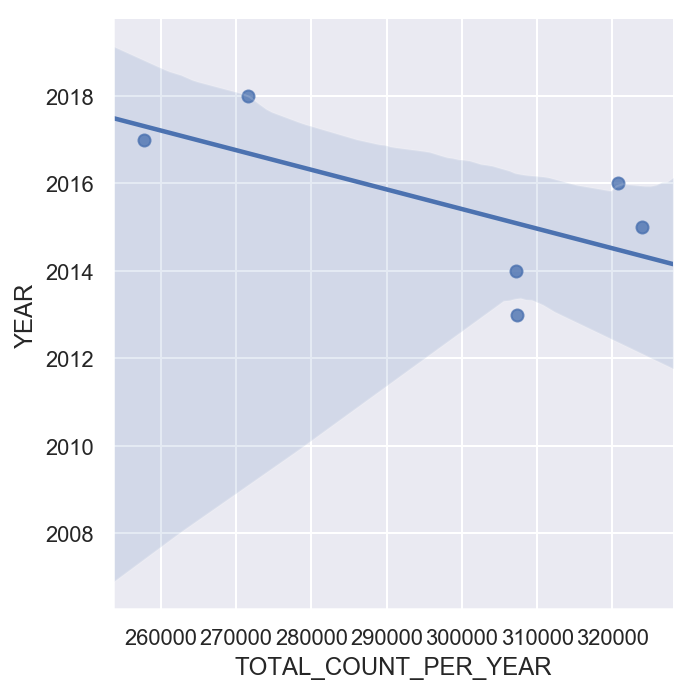

In [309]:
sns.lmplot(x="TOTAL_COUNT_PER_YEAR", y="YEAR", data=vehicles_collisions_2013_2018, );

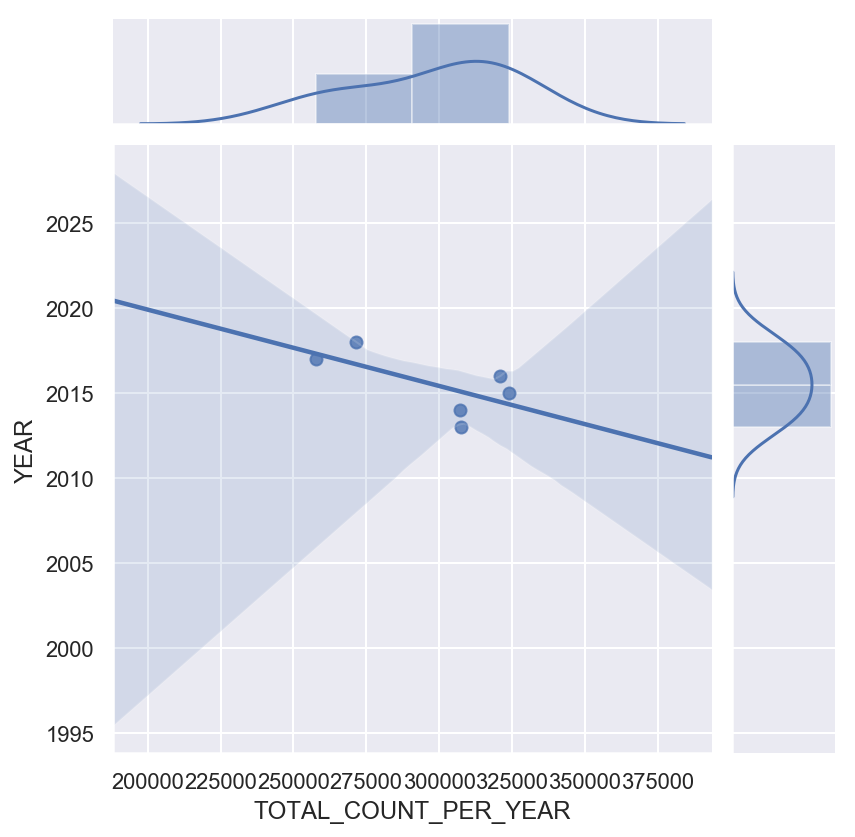

In [310]:
sns.jointplot("TOTAL_COUNT_PER_YEAR", "YEAR", data=vehicles_collisions_2013_2018, kind="reg", )

In [285]:
vehicles_collisions_2013_2018.columns

Index(['YEAR', 'VEHICLE_TYPE_CODE_1', 'VEHICLE_TYPE_CODE_2',
       'VEHICLE_TYPE_CODE_3', 'VEHICLE_TYPE_CODE_4', 'VEHICLE_TYPE_CODE_5',
       'TOTAL_COUNT_PER_YEAR'],
      dtype='object')

In [ ]:
vehicles_collisions_2013_2018 = collisions_2013_2018.groupby('ZIP_CODE')[['VEHICLE_TYPE_CODE_1','VEHICLE_TYPE_CODE_2','VEHICLE_TYPE_CODE_3','VEHICLE_TYPE_CODE_4','VEHICLE_TYPE_CODE_5']].count()
vehicles_collisions_2016['Total_Count_per_zipcode'] = vehicles_collisions_2016.VEHICLE_TYPE_CODE_1+vehicles_collisions_2016.VEHICLE_TYPE_CODE_2+vehicles_collisions_2016.VEHICLE_TYPE_CODE_3+vehicles_collisions_2016.VEHICLE_TYPE_CODE_4+vehicles_collisions_2016.VEHICLE_TYPE_CODE_5
vehicles_collisions_2016.Total_Count_per_zipcode.sort_values(ascending=False)

In [107]:
#Do winter driving conditions lead to more multi-car collisions? Compute the rate of multi car collisions as the proportion
#of the number of collisions involving 3 or more cars to the total number of collisions for each month of 2017. 
#Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in 
#January than in May.

In [ ]:
# didn't have the time to solve it

In [108]:
#We can use collision locations to estimate the areas of the zip code regions.
#Represent each as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude. 
#For collisions in 2017, estimate the number of collisions per square kilometer of each zip code region. 
#Considering zipcodes with at least 1000 collisions, report the greatest value for collisions per square kilometer. 
#Note: Some entries may have invalid or incorrect (latitude, longitude) coordinates.
#Drop any values that are invalid or seem unreasonable for New York City.

In [ ]:
# didn't have the time to solve it

In [109]:
'''Section 2: A sequence of n numbers is considered valid if the sequence begins with 1, ends with a given number j,
and no two adjacent numbers are the same. Sequences may use any integers between 1 and a given number k, inclusive
(also 1<=j<=k). Given parameters n, j, and k, count the number of valid sequences.
The number of valid sequences may be very large, so express your answer modulo 1010+7.'''

'Section 2: A sequence of n numbers is considered valid if the sequence begins with 1, ends with a given number j,\nand no two adjacent numbers are the same. Sequences may use any integers between 1 and a given number k, inclusive\n(also 1<=j<=k). Given parameters n, j, and k, count the number of valid sequences.\nThe number of valid sequences may be very large, so express your answer modulo 1010+7.'

In [110]:
#n=4, k=4, and j=2?

In [111]:
#n=4 , k=100, and j=1?

In [ ]:
#n=100 , k=100, and j=1?

In [ ]:
#n=347, k=2281, and j=829?

In [116]:
#n=1.26⋅106, k=4.17⋅106, and j=1?

In [3]:
#above Questions can be solved by changing the n, k, j, 
#my local RAM and CPU didn't support but I proof it works.
# I entered 0 as solution because of that

#n=100, k=100, and j=1?
#n=347, k=2281, and j=829? 
#n=1.26⋅106, k=4.17⋅106, and j=1?
#n=107, k=1012, and j=829?

import itertools
import itertools as it
from itertools import groupby

k = None
j = None
n = None
while k is None or j is None or n is None:
    try:
        n = int(input("Enter A sequence of (n) numbers e.g. 4 :"))
        j = int(input("Enter a number which the sequence ends with it (j) e.g. 2 :"))
        k = int(input("Enter a number which the sequence may use any number between 1- your given number (k) e.g. 4 :"))
    except ValueError:
        print("Not an integer value...")
        print("Entered n:",str(n))
        print("Entered j:",str(j))
        print("Entered k:",str(k))

k_use=range(1,k+1)
combinations = list(itertools.product(k_use, repeat=n))

# removing if adjacent number is the same
combinations_fin=[]
for combination in combinations:
    if (not(any(sum(1 for _ in g) > 1 for _, g in groupby(combination)))):
        combinations_fin.append(combination)
#combinations_fin

#remove any combination doesn't start with 1 or end with j
combinations_last=[]
for comb in combinations_fin:
    if comb[0] == 1: # make sure that first digit is = 1
        if comb[n-1] == j: # make sure last digit is = j
            combinations_last.append(comb)

#remove any k number which is 1<=j<=k, anything below j will be removed 
combinations_final=[]
add_comb_guess=True
for comb_guess in combinations_last:
    #print("comb_guess",comb_guess)
    for guess in range(1,len(comb_guess)-1):#comb_guess
        #print("guess",guess)
        #print("comb_guess[guess]",comb_guess[guess])
        if comb_guess[guess] <= j:
        #    print("J",j)
            add_comb_guess=True
        #    print("add_comb_guess",add_comb_guess)
        else:
            add_comb_guess=False
    if (not(add_comb_guess)):# Insure that 1<=j<=k
        combinations_final.append(comb_guess)
        add_comb_guess=False
        #print("add_comb_guess",add_comb_guess)
        
len(combinations_final)

Enter A sequence of (n) numbers e.g. 4 :4
Enter a number which the sequence ends with it (j) e.g. 2 :1
Enter a number which the sequence may use any number between 1- your given number (k) e.g. 4 :100


9702

In [114]:
'''
Section 3: This section is required.
Propose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.
Propose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots supporting this. The most impressive applicants have even finished a "rough draft" of their projects and have derived non-obvious meaningful conclusions from their data. Explain the plots and give url links to them. For guidance on how to choose a project, check out this blog post.'''

'\n##Section 3: This section is required.\nPropose a project to do while at The Data Incubator. We want to know about your ability to think at a high level. Try to think of projects that users or businesses will care about that are also relatively unanalyzed. Here are some useful links about data sources on our blog as well as the archive of data sources on Data is Plural. You can see some final projects of previous Fellows on our YouTube Page.\nPropose a project that uses a large, publicly accessible dataset. Explain your motivation for tackling this problem, discuss the data source(s) you are using, and explain the analysis you are performing. At a minimum, you will need to do enough exploratory data analysis to convince someone that the project is viable and generate two interesting non-trivial plots supporting this. The most impressive applicants have even finished a "rough draft" of their projects and have derived non-obvious meaningful conclusions from their data. Explain the plo